In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [5]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

In [6]:
df = pd.read_csv("../../input/fe-course-data/ames.csv")
X = df.copy()
y = X.pop("SalePrice")
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

In [7]:
X.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MiscVal          float64
MoSold             int64
YearSold           int64
SaleType          object
SaleCondition     object
Length: 78, dtype: object

In [8]:
X.select_dtypes("category")

""
0
1
2
3
4
...
2925
2926
2927
2928


In [9]:
X.select_dtypes("object")

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Partial_Pavement,No_Pool,No_Fence,None,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,No_Fence,Gar2,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,Gtl,Mitchell,...,Detchd,Unf,Typical,Typical,Paved,No_Pool,Good_Privacy,None,WD,Normal
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,Mod,Mitchell,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal
2927,Split_Foyer,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Mitchell,...,No_Garage,No_Garage,No_Garage,No_Garage,Paved,No_Pool,Minimum_Privacy,Shed,WD,Normal
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Mod,Mitchell,...,Attchd,RFn,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal


In [10]:
factorized_colnames = set()
for colname in X.select_dtypes("object", "category"):
    X[colname], _ = X[colname].factorize()
    factorized_colnames.add(colname)
print(factorized_colnames)

{'SaleCondition', 'Condition2', 'LotShape', 'Neighborhood', 'PoolQC', 'BsmtFinType1', 'Functional', 'OverallQual', 'BsmtFinType2', 'LandContour', 'GarageCond', 'MSSubClass', 'LotConfig', 'GarageFinish', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'GarageQual', 'Fence', 'Heating', 'Condition1', 'GarageType', 'Exterior1st', 'Alley', 'MasVnrType', 'PavedDrive', 'RoofMatl', 'BldgType', 'Street', 'RoofStyle', 'ExterCond', 'HeatingQC', 'OverallCond', 'LandSlope', 'Exterior2nd', 'ExterQual', 'Foundation', 'KitchenQual', 'FireplaceQu', 'MiscFeature', 'SaleType', 'CentralAir', 'MSZoning', 'Utilities', 'Electrical', 'HouseStyle'}


In [11]:
discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
discrete_features_names = set()
for name, dtype in zip(X.columns, X.dtypes):
    if pd.api.types.is_integer_dtype(dtype):
        discrete_features_names.add(name)
print(discrete_features_names)

{'KitchenAbvGr', 'SaleCondition', 'Condition2', 'LotShape', 'Neighborhood', 'PoolQC', 'YearBuilt', 'BsmtFinType1', 'OverallQual', 'BsmtFinType2', 'BsmtHalfBath', 'Functional', 'LandContour', 'YearSold', 'GarageCond', 'MSSubClass', 'LotConfig', 'GarageFinish', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'GarageQual', 'Fence', 'Heating', 'Condition1', 'GarageType', 'Alley', 'Exterior1st', 'MasVnrType', 'PavedDrive', 'BsmtFullBath', 'MoSold', 'RoofMatl', 'BldgType', 'Street', 'Fireplaces', 'GarageCars', 'RoofStyle', 'ExterCond', 'YearRemodAdd', 'HeatingQC', 'OverallCond', 'LandSlope', 'Exterior2nd', 'ExterQual', 'Foundation', 'KitchenQual', 'FireplaceQu', 'TotRmsAbvGrd', 'HalfBath', 'MiscFeature', 'FullBath', 'SaleType', 'CentralAir', 'BedroomAbvGr', 'MSZoning', 'Utilities', 'Electrical', 'HouseStyle'}


In [12]:
print(discrete_features_names - factorized_colnames)

{'KitchenAbvGr', 'MoSold', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YearBuilt', 'HalfBath', 'FullBath', 'YearSold', 'BsmtHalfBath', 'YearRemodAdd', 'BedroomAbvGr', 'BsmtFullBath'}


In [13]:
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [14]:
mi_scores[::3]

OverallQual      0.583114
YearBuilt        0.439255
GarageCars       0.388689
ExterQual        0.325002
MSSubClass       0.295679
Foundation       0.239653
FireplaceQu      0.217988
Exterior2nd      0.189262
BsmtFinSF1       0.170449
Fireplaces       0.167277
OverallCond      0.128073
WoodDeckSF       0.119989
GarageQual       0.093765
SaleCondition    0.091702
LotShape         0.075600
BsmtFullBath     0.056839
BsmtCond         0.050372
Fence            0.041029
BsmtFinType2     0.030322
LandContour      0.026473
LotConfig        0.016832
ScreenPorch      0.012863
Functional       0.007794
RoofMatl         0.003317
LandSlope        0.002160
MoSold           0.000000
Name: MI Scores, dtype: float64

In [15]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
melt = df.melt(id_vars="SalePrice", value_vars=features)
melt

,SalePrice,variable,value
0,215000,YearBuilt,1960.0
1,105000,YearBuilt,1961.0
2,172000,YearBuilt,1958.0
3,244000,YearBuilt,1968.0
4,189900,YearBuilt,1997.0
...,...,...,...
8785,142500,ScreenPorch,0.0
8786,131000,ScreenPorch,0.0
8787,132000,ScreenPorch,0.0
8788,170000,ScreenPorch,0.0


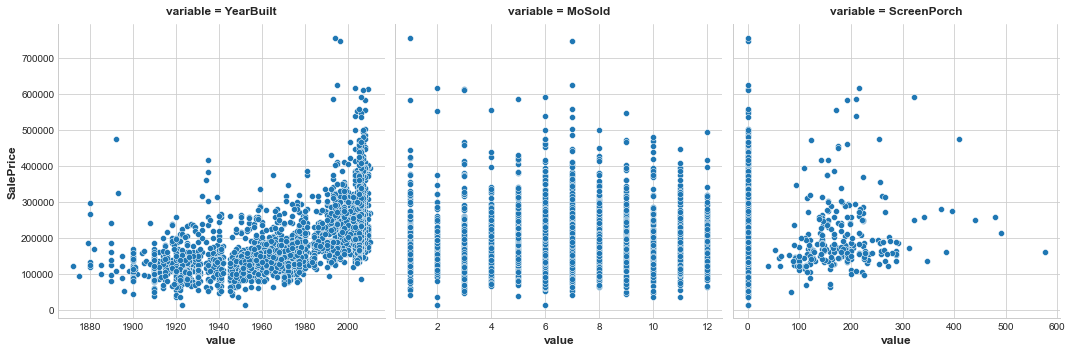

In [16]:
sns.relplot(x="value", y="SalePrice", col="variable", data=melt, facet_kws=dict(sharex=False))

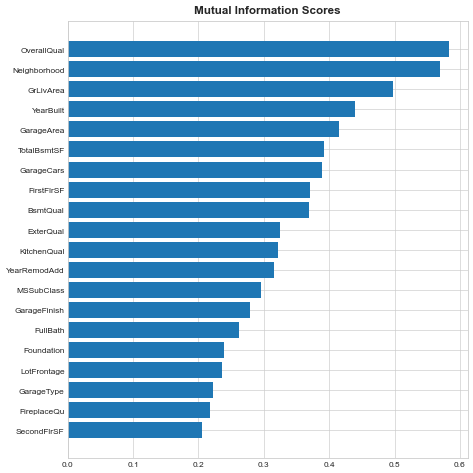

In [17]:
def show_mi_scores(scores):
    plt.figure(dpi=60, figsize=(8, 8))
    scores = scores.sort_values()
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

show_mi_scores(mi_scores[:20])

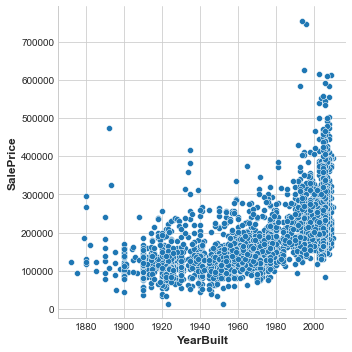

In [18]:
sns.relplot(x="YearBuilt", y="SalePrice", data=df)

KeyboardInterrupt: 

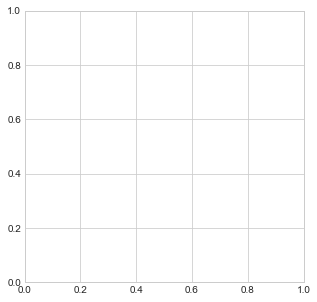

In [19]:
sns.lmplot(x="YearBuilt", y="SalePrice", hue="Street", data=df)

In [ ]:
X.groupBy()

In [ ]:
df["YearBuilt"].count()

In [ ]:
df["AvgYearSoldByYearBuilt"] = df.groupby("YearBuilt")["YearSold"].transform("mean")

In [ ]:
type(df.count())